# Exploratory Data Analysis
Import, Clean, and Visualize the Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#the Seaborn package comes with several preloaded datasets one of which is the famous Titanic dataset
#Check the size of the dataset to see how large it is 

df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [3]:
#Check the type of data and what missing values you may have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [59]:
#The deck column is practically worthless because of how little data there is on this attribute
#Drop this from the dataset

df = df.drop('deck', axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#many of the age values are missing
#Pandas dataframe.interpolate() function is a powerful function to fill NA values in dataframes
#Pandas interpolate function uses various interpolation techniques to fill the missing values rather than hard-coding the value.

df['age'] = df['age'].interpolate()
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Start with Simple Graphs
    Hone the skill of asking quesitons of your data
    THEN seek to understand those questions with visualizations

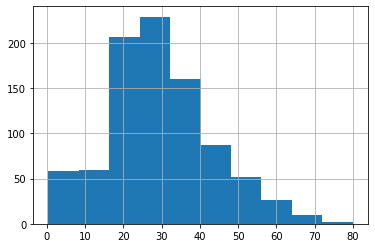

In [7]:
#Histograms are easy ways to see how your data is distributed

df['age'].hist()

# Two easy tips to make your graphs more readable
    1.Use Seaborn's set_style and add contrasting background color
    2.Bin your data into more manageable groups

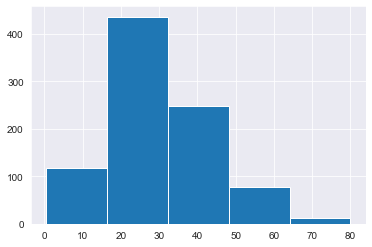

In [8]:
#import set_styles from seaborn package to make your graph more readable
#define the grid background as well with any of the following: darkgrid, whitegrid, dark, white, ticks
#if you want to remove Seaborn's formatting: sns.reset_orig()

#Set differnt bin sizes of your histograms

sns.set_style('darkgrid')
df['age'].hist(bins=5)

C:\Users\v-julca\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\v-julca\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


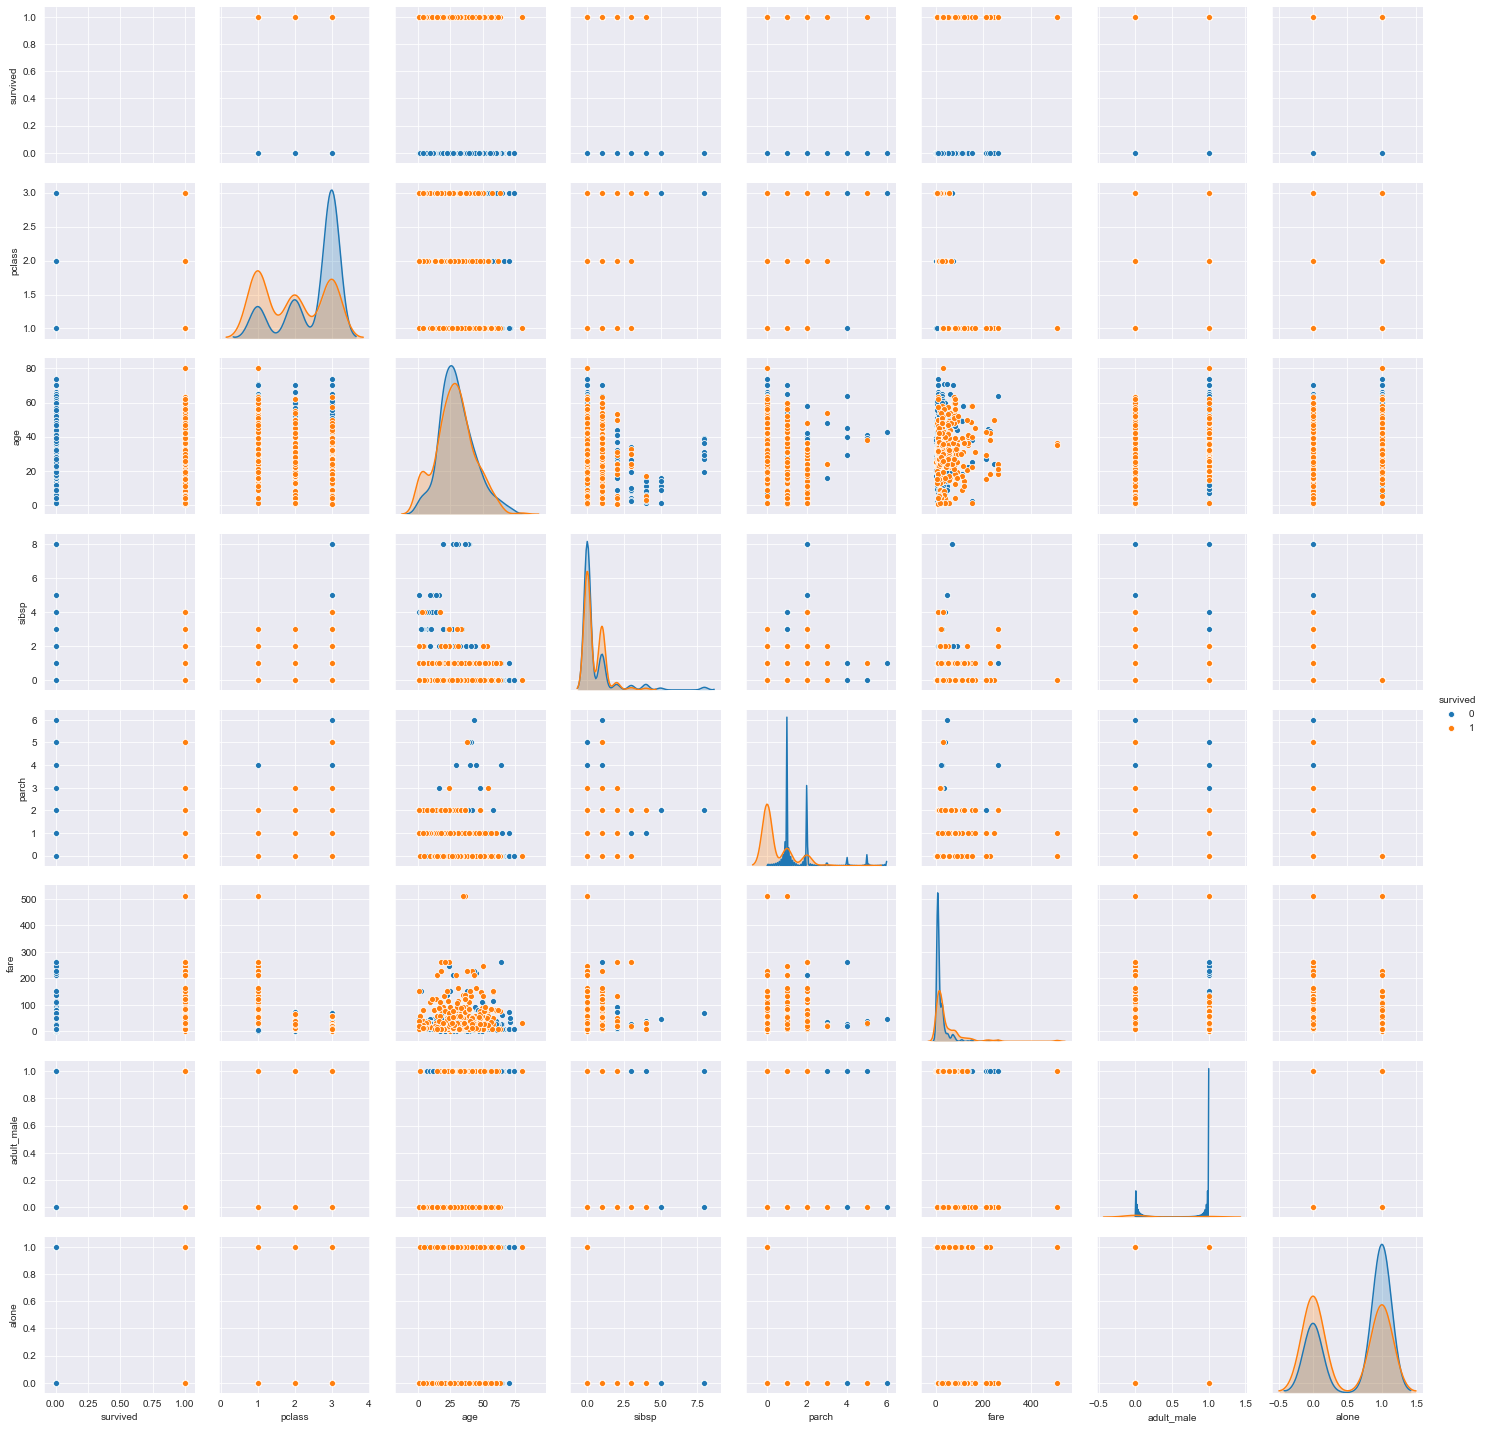

In [9]:
#Although this graph is largely unhelpful for this particular dataset, it is a great line of code to know for other EDA
#Purpose of pairplots: quickly show a visual relation of all numerical elements in a dataframe based on a single named category(hue)

from warnings import filterwarnings
sns.pairplot(df, hue='survived')

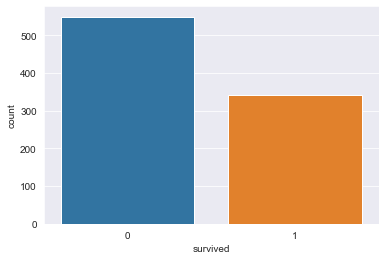

In [10]:
sns.countplot('survived', data=df)

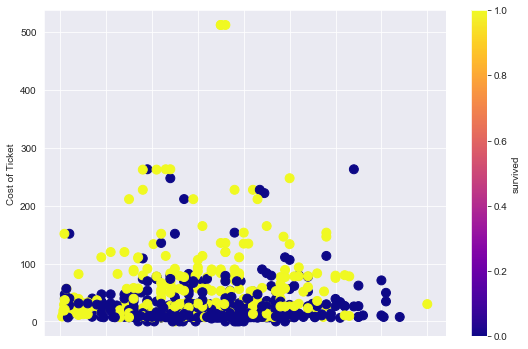

In [51]:
#Create scatter plots 
#many colors to choose from at https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
#other popular/recommended contrast colors in matplotlib are: viridis, inferno, magma, and cividis
#reset the figure size, and increse the size of your plotted data points to see your plot better

df.plot.scatter(x='age', y='fare',
                c='survived', s=80, cmap=plt.cm.plasma)
plt.xlabel('Age')
plt.ylabel('Cost of Ticket')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

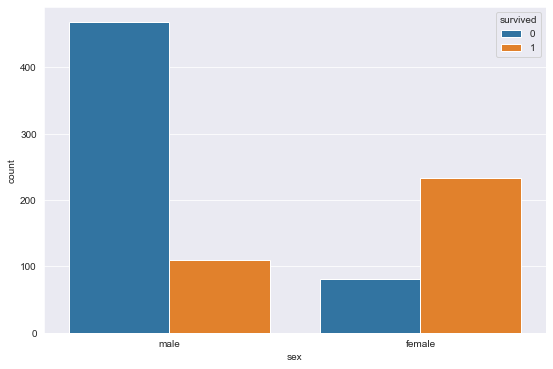

In [52]:
sns.countplot('sex', hue='survived', data=df)

Text(0.5, 0, 'Passenger Class')

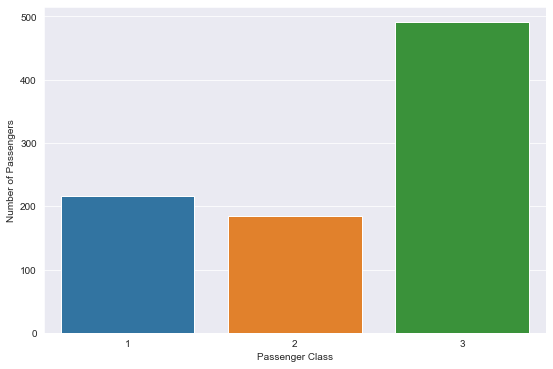

In [53]:
#Seaborn package is also very useful for creating visualizations

sns.countplot('pclass', data=df)
plt.ylabel('Number of Passengers')
plt.xlabel('Passenger Class')

# Grouping Function
    Group your data in order to gain combined insight across various attributes
    THEN combine Grouping with Plotting. A Double Wammy!

In [54]:
df.groupby(['embark_town', 'survived'])['fare'].aggregate([np.mean]).unstack()

mean           
survived             0          1
embark_town                      
Cherbourg    35.443335  79.720926
Queenstown   13.335904  13.182227
Southampton  20.743987  39.547081

In [55]:
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [56]:
df.groupby(['sex', 'class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Text(0.5, 0, 'Sex of Passengers that Survived')

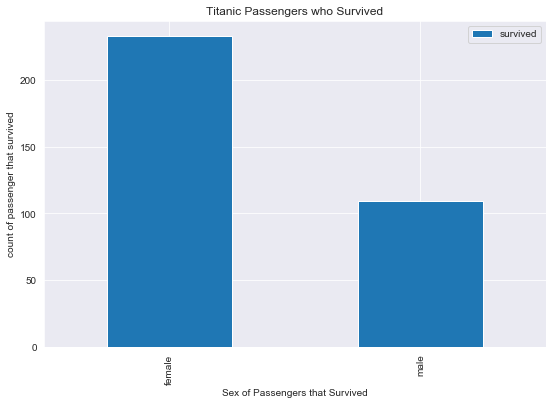

In [57]:
df.groupby('sex').agg('sum')[['survived']].plot(kind='bar')
plt.ylabel('count of passenger that survived')
plt.title('Titanic Passengers who Survived')
plt.xlabel('Sex of Passengers that Survived')